In [39]:
!pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 487.6 kB/s eta 0:05:08
   ---------------------------------------- 0.1/150.0 MB 939.4 kB/s eta 0:02:40
   ---------------------------------------- 0.2/150.0 MB 1.2 MB/s eta 0:02:09
   ---------------------------------------- 0.2/150.0 MB 1.2 MB/s eta 0:02:09
   ---------------------------------------- 0.3/150.0 MB 1.1 MB/s eta 0:02:19
   ---------------------------------------- 0.5/150.0 MB 1.4 MB/s eta 0:01:44
   ---------------------------------------- 0.6/150.0 MB 1.8 MB/s eta 0:01:24
   ---------------------------------------- 0.7/150.0 MB 1.8 MB/s eta 0:01:22
   ---------------------------------------- 0.8/150.0 MB 2.0 MB/s eta 0:01:16
   ---------------------------------------- 0.9/150.0 MB 2.0 MB/s eta 0:01:15
   


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------------- ----------------- 83.2/150.0 MB 3.1 MB/s eta 0:00:22
   ---------------------- ----------------- 83.3/150.0 MB 3.0 MB/s eta 0:00:22
   ---------------------- ----------------- 83.5/150.0 MB 3.1 MB/s eta 0:00:22
   ---------------------- ----------------- 83.5/150.0 MB 3.0 MB/s eta 0:00:22
   ---------------------- ----------------- 83.7/150.0 MB 3.1 MB/s eta 0:00:22
   ---------------------- ----------------- 83.8/150.0 MB 3.0 MB/s eta 0:00:22
   ---------------------- ----------------- 83.9/150.0 MB 3.1 MB/s eta 0:00:22
   ---------------------- ----------------- 83.9/150.0 MB 3.1 MB/s eta 0:00:22
   ---------------------- ----------------- 84.2/150.0 MB 3.0 MB/s eta 0:00:22
   ---------------------- ----------------- 84.4/150.0 MB 3.0 MB/s eta 0:00:22
   ---------------------- ----------------- 84.5/150.0 MB 3.0 MB/s eta 0:00:22
   ---------------------- ----------------- 84.6/150.0 MB 3.0 MB/s eta 0:00:22
   ---------------------- ----------------- 84.8/150

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer, MinMaxScaler,StandardScaler

In [4]:
data=pd.read_csv('repo_main - Sheet1 (1).csv')
data=data[::-1]
data = data.reset_index(drop=True)

rate=pd.read_csv('DFF_m - DFF (1).csv')

In [5]:
rate.head()

,observation_date,DFF
0,2018-1-1,1.33
1,2018-2-1,1.42
2,2018-3-1,1.42
3,2018-4-1,1.42
4,2018-5-1,1.42


In [6]:
data.head(5)

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,Unnamed: 6
0,4/2/2018,1.80,849,1.950,3.823,324.262,NaN
1,4/3/2018,1.83,825,1.930,8.695,299.702,NaN
2,4/4/2018,1.74,859,1.795,4.570,300.604,NaN
3,4/5/2018,1.75,829,1.830,4.645,292.669,NaN
4,4/6/2018,1.75,845,1.819,4.895,291.637,NaN


In [7]:
data=data.dropna(axis=1)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1873 entries, 0 to 1872
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1873 non-null   object 
 1   SOFR Fix     1873 non-null   float64
 2   SOFR Volume  1873 non-null   object 
 3   DTCC Tsy     1873 non-null   float64
 4   RRP Amt      1873 non-null   float64
 5   TGA Balance  1873 non-null   float64
dtypes: float64(4), object(2)
memory usage: 87.9+ KB


In [9]:
data.shape

(1873, 6)

In [10]:
data['Date'] = pd.to_datetime(data['Date'], format='mixed', dayfirst=True, errors='coerce')
data['SOFR Volume']=pd.to_numeric(data['SOFR Volume'],errors='coerce')

rate['observation_date'] = pd.to_datetime(rate['observation_date'], format='mixed', dayfirst=True, errors='coerce')


In [11]:
rate.head()

,observation_date,DFF
0,2018-01-01,1.33
1,2018-02-01,1.42
2,2018-03-01,1.42
3,2018-04-01,1.42
4,2018-05-01,1.42


In [12]:
data.isnull().sum()

Date            0
SOFR Fix        0
SOFR Volume    14
DTCC Tsy        0
RRP Amt         0
TGA Balance     0
dtype: int64

In [13]:
data['SOFR Volume'] = data['SOFR Volume'].fillna(data['SOFR Volume'].mean())

In [14]:
data.head(20)

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance
0,2018-02-04,1.80,849.0,1.950,3.823,324.262
1,2018-03-04,1.83,825.0,1.930,8.695,299.702
2,2018-04-04,1.74,859.0,1.795,4.570,300.604
3,2018-05-04,1.75,829.0,1.830,4.645,292.669
4,2018-06-04,1.75,845.0,1.819,4.895,291.637
5,2018-09-04,1.75,833.0,1.834,4.070,301.022
6,2018-10-04,1.75,811.0,1.825,3.990,302.176
7,2018-11-04,1.76,811.0,1.823,2.361,287.804
8,2018-12-04,1.73,871.0,1.786,4.120,225.320
9,2018-04-13,1.72,776.0,1.796,3.471,245.560


In [15]:
data['Date'] = pd.to_datetime(data['Date'])
rate['observation_date'] = pd.to_datetime(rate['observation_date'])

# Merge by matching dates (left join keeps all rows from 'data')
merged_df = data.merge(
    rate[['observation_date', 'DFF']],
    left_on='Date',
    right_on='observation_date',
    how='left'
)

# Drop redundant 'observation_date' column
merged_df = merged_df.drop(columns=['observation_date'])

In [16]:
merged_df.head()

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF
0,2018-02-04,1.80,849.0,1.950,3.823,324.262,1.68
1,2018-03-04,1.83,825.0,1.930,8.695,299.702,1.69
2,2018-04-04,1.74,859.0,1.795,4.570,300.604,1.69
3,2018-05-04,1.75,829.0,1.830,4.645,292.669,1.69
4,2018-06-04,1.75,845.0,1.819,4.895,291.637,1.69


In [17]:
import pandas as pd

# Ensure both date columns are datetime type
data['Date'] = pd.to_datetime(data['Date'])
rate['observation_date'] = pd.to_datetime(rate['observation_date'])

# Merge by matching dates (left join keeps all rows from 'data')
merged_df = data.merge(
    rate[['observation_date', 'DFF']],
    left_on='Date',
    right_on='observation_date',
    how='left'
)

# Drop redundant 'observation_date' column
df = merged_df.drop(columns=['observation_date'])


In [18]:
df.head()

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF
0,2018-02-04,1.80,849.0,1.950,3.823,324.262,1.68
1,2018-03-04,1.83,825.0,1.930,8.695,299.702,1.69
2,2018-04-04,1.74,859.0,1.795,4.570,300.604,1.69
3,2018-05-04,1.75,829.0,1.830,4.645,292.669,1.69
4,2018-06-04,1.75,845.0,1.819,4.895,291.637,1.69


In [19]:
# data['Date'] = range(1, len(data) + 1)
# df['SOFR_lag1'] = df['SOFR Fix'].shift(1)
# df['SOFR_lag2'] = df['SOFR Fix'].shift(2)
# df['SOFR_lag3'] = df['SOFR Fix'].shift(3)
# df['SOFR_lag4'] = df['SOFR Fix'].shift(4)
# df['SOFR_lag5'] = df['SOFR Fix'].shift(5)

In [20]:


df.isnull().sum()

Date           0
SOFR Fix       0
SOFR Volume    0
DTCC Tsy       0
RRP Amt        0
TGA Balance    0
DFF            0
dtype: int64

In [21]:
df.head(10)

,Date,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF
0,2018-02-04,1.80,849.0,1.950,3.823,324.262,1.68
1,2018-03-04,1.83,825.0,1.930,8.695,299.702,1.69
2,2018-04-04,1.74,859.0,1.795,4.570,300.604,1.69
3,2018-05-04,1.75,829.0,1.830,4.645,292.669,1.69
4,2018-06-04,1.75,845.0,1.819,4.895,291.637,1.69
5,2018-09-04,1.75,833.0,1.834,4.070,301.022,1.69
6,2018-10-04,1.75,811.0,1.825,3.990,302.176,1.69
7,2018-11-04,1.76,811.0,1.823,2.361,287.804,1.69
8,2018-12-04,1.73,871.0,1.786,4.120,225.320,1.69
9,2018-04-13,1.72,776.0,1.796,3.471,245.560,1.69


In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%d/%m', errors='coerce')

# 2) Extract day, year, month
df['day'] = df['Date'].dt.day
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month

# 3) Month cyclical encoding
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

# 4) Day of week (dow) cyclical encoding
df['dow'] = df['Date'].dt.dayofweek  # Monday=0, Sunday=6
df['dow_sin'] = np.sin(2 * np.pi * df['dow'] / 7)
df['dow_cos'] = np.cos(2 * np.pi * df['dow'] / 7)

# 5) Week of year (1-52 or 53)
df['weekofyear'] = df['Date'].dt.isocalendar().week

# 6) Quarter (1-4)
df['quarter'] = df['Date'].dt.quarter

# 7) Month-end, quarter-end, year-end flags
df['month_end_flag'] = df['Date'].dt.is_month_end.astype(int)
df['quarter_end_flag'] = df['Date'].dt.is_quarter_end.astype(int)
df['year_end_flag'] = df['Date'].dt.is_year_end.astype(int)

# 8) Drop original Date column
df = df.drop(columns=['Date'])



In [23]:
df.tail(10)

,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF,day,year,month,month_sin,month_cos,dow,dow_sin,dow_cos,weekofyear,quarter,month_end_flag,quarter_end_flag,year_end_flag
1863,4.28,2644.0,4.340,168.645,288.078,4.33,13,2025,6,1.224647e-16,-1.0,4,-0.433884,-0.900969,24,2,0,0,0
1864,4.32,2697.0,4.380,140.759,446.302,4.33,16,2025,6,1.224647e-16,-1.0,0,0.000000,1.000000,25,2,0,0,0
1865,4.31,2692.0,4.360,168.939,409.139,4.33,17,2025,6,1.224647e-16,-1.0,1,0.781831,0.623490,25,2,0,0,0
1866,4.28,2639.0,4.329,205.050,383.851,4.33,18,2025,6,1.224647e-16,-1.0,2,0.974928,-0.222521,25,2,0,0,0
1867,4.29,2700.0,4.331,138.283,366.520,4.33,20,2025,6,1.224647e-16,-1.0,4,-0.433884,-0.900969,25,2,0,0,0
1868,4.29,2740.0,4.343,165.319,374.568,4.33,23,2025,6,1.224647e-16,-1.0,0,0.000000,1.000000,26,2,0,0,0
1869,4.36,2772.0,4.408,210.879,334.579,4.33,25,2025,6,1.224647e-16,-1.0,2,0.974928,-0.222521,26,2,0,0,0
1870,4.40,2802.0,4.412,252.400,304.841,4.33,26,2025,6,1.224647e-16,-1.0,3,0.433884,-0.900969,26,2,0,0,0
1871,4.39,2775.0,4.405,285.742,338.348,4.33,27,2025,6,1.224647e-16,-1.0,4,-0.433884,-0.900969,26,2,0,0,0
1872,4.45,2964.0,4.574,460.731,245.530,4.33,30,2025,6,1.224647e-16,-1.0,0,0.000000,1.000000,27,2,1,1,0


0.16161546961181603


C:\Users\Yash Singhal\AppData\Local\Temp\ipykernel_23568\1061452019.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SOFR Fix'])


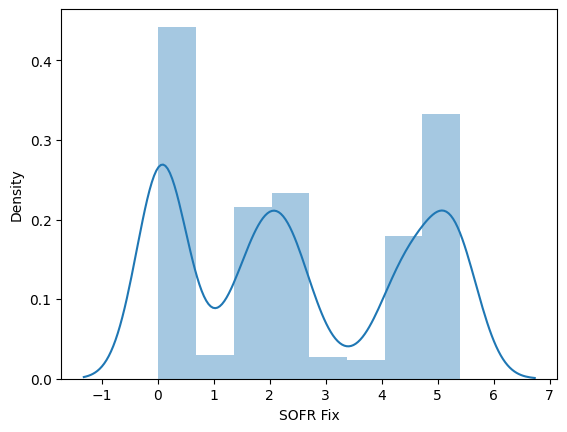

In [24]:
sns.distplot(df['SOFR Fix'])
print(df['SOFR Fix'].skew())

1.3881654049230205


C:\Users\Yash Singhal\AppData\Local\Temp\ipykernel_23568\1952875412.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SOFR Volume'])


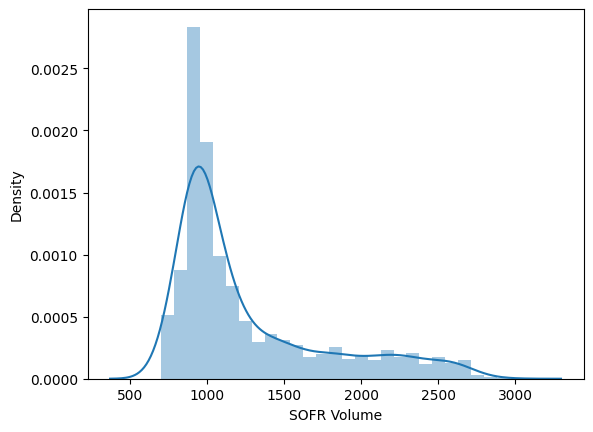

In [25]:
sns.distplot(df['SOFR Volume'])
print(df['SOFR Volume'].skew())

C:\Users\Yash Singhal\AppData\Local\Temp\ipykernel_23568\626132318.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DTCC Tsy'])


0.1510650118544129


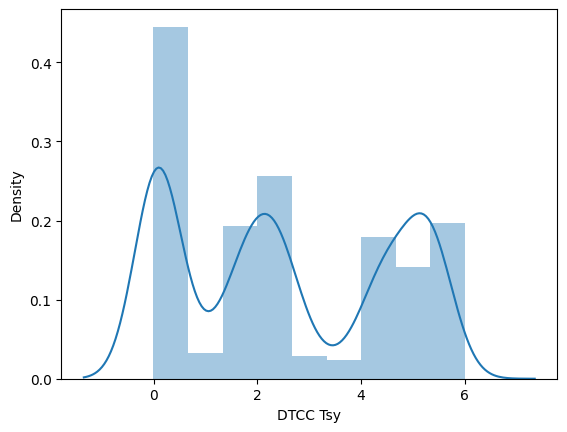

In [26]:
sns.distplot(df['DTCC Tsy'])
print(df['DTCC Tsy'].skew())

0.8259880034161988


C:\Users\Yash Singhal\AppData\Local\Temp\ipykernel_23568\84510397.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['RRP Amt'])


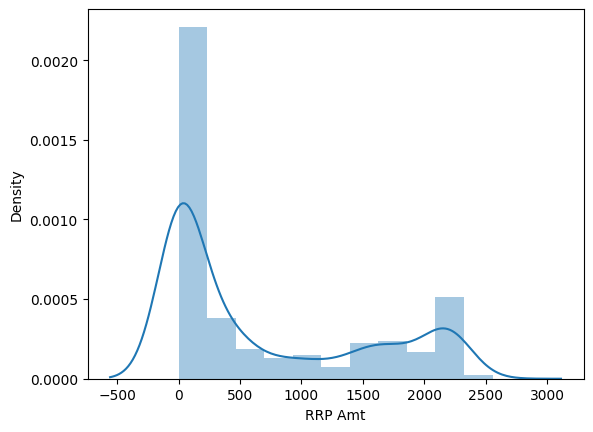

In [27]:
sns.distplot(df['RRP Amt'])
print(df['RRP Amt'].skew())

C:\Users\Yash Singhal\AppData\Local\Temp\ipykernel_23568\1637397520.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TGA Balance'])


1.2099502707550547


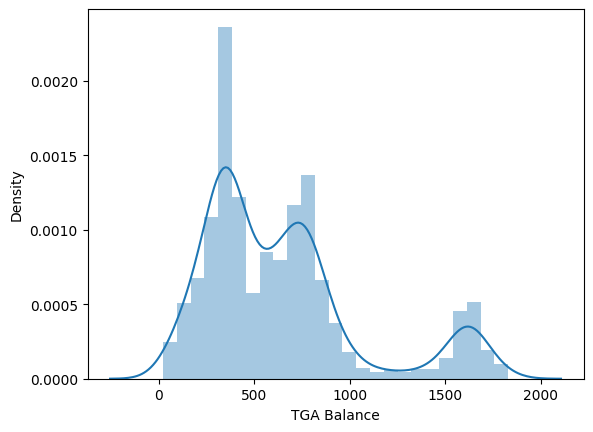

In [28]:
sns.distplot(df['TGA Balance'])
print(df['TGA Balance'].skew())

In [29]:
n_total = len(df)
n_train = int(0.8 * n_total)
n_val = int(0.1 * n_total)
n_test = n_total - n_train - n_val  # ensures it sums to total

train_end_idx = n_train - 1
val_end_idx = n_train + n_val - 1

df_train = df.iloc[:train_end_idx + 1]
df_val = df.iloc[train_end_idx + 1:val_end_idx + 1]
df_test = df.iloc[val_end_idx + 1:]

In [30]:
df_test.head()

,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF,day,year,month,month_sin,month_cos,dow,dow_sin,dow_cos,weekofyear,quarter,month_end_flag,quarter_end_flag,year_end_flag
1685,4.84,2133.0,4.891,416.193,778.910,4.83,25,2024,9,-1.000000,-1.836970e-16,2,0.974928,-0.222521,39,3,0,0,0
1686,4.83,2329.0,4.893,424.916,746.699,4.83,26,2024,9,-1.000000,-1.836970e-16,3,0.433884,-0.900969,39,3,0,0,0
1687,4.84,2077.0,4.892,436.518,772.704,4.83,27,2024,9,-1.000000,-1.836970e-16,4,-0.433884,-0.900969,39,3,0,0,0
1688,4.96,2523.0,5.221,465.638,885.725,4.83,30,2024,9,-1.000000,-1.836970e-16,0,0.000000,1.000000,40,3,1,1,0
1689,5.05,2395.0,5.159,375.221,813.994,5.33,1,2024,10,-0.866025,5.000000e-01,1,0.781831,0.623490,40,4,0,0,0


<Axes: ylabel='SOFR Fix'>

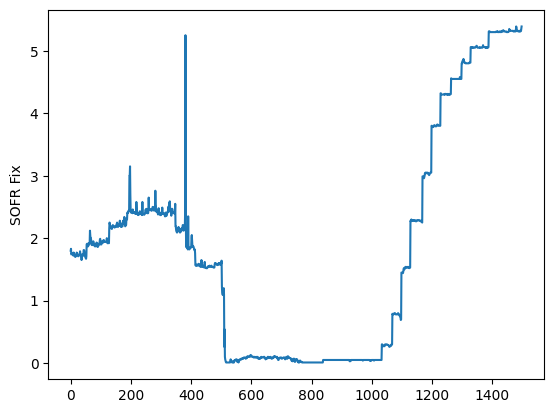

In [31]:
sns.lineplot(df_train['SOFR Fix'])

In [32]:
p=PowerTransformer(method='yeo-johnson')
cols_to_transform = ['SOFR Volume', 'RRP Amt', 'TGA Balance']

df_train[cols_to_transform] = p.fit_transform(df_train[cols_to_transform])
df_test[cols_to_transform] = p.transform(df_test[cols_to_transform])
df_val[cols_to_transform] = p.transform(df_val[cols_to_transform])

C:\Users\Yash Singhal\AppData\Local\Temp\ipykernel_23568\2120343100.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[cols_to_transform] = p.fit_transform(df_train[cols_to_transform])
C:\Users\Yash Singhal\AppData\Local\Temp\ipykernel_23568\2120343100.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[cols_to_transform] = p.transform(df_test[cols_to_transform])
C:\Users\Yash Singhal\AppData\Local\Temp\ipykernel_23568\2120343100.py:6: SettingWithCopyWarning: 
A value is trying to be set o

In [33]:
df_val.head()

,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF,day,year,month,month_sin,month_cos,dow,dow_sin,dow_cos,weekofyear,quarter,month_end_flag,quarter_end_flag,year_end_flag
1498,5.40,2.254936,5.495,0.838929,0.527366,5.33,28,2023,12,-2.449294e-16,1.000000e+00,3,0.433884,-0.900969,52,4,0,0,0
1499,5.38,2.095804,5.434,0.903081,0.611226,5.33,29,2023,12,-2.449294e-16,1.000000e+00,4,-0.433884,-0.900969,52,4,0,0,0
1500,5.38,2.095804,5.434,0.903081,0.611226,5.33,1,2024,1,5.000000e-01,8.660254e-01,0,0.000000,1.000000,1,1,0,0,0
1501,5.40,2.372654,5.504,0.788013,0.607005,5.33,1,2024,2,8.660254e-01,5.000000e-01,3,0.433884,-0.900969,5,1,0,0,0
1502,5.39,2.254936,5.451,0.794608,0.563453,5.33,1,2024,3,1.000000e+00,6.123234e-17,4,-0.433884,-0.900969,9,1,0,0,0


In [34]:
m=MinMaxScaler()
s=StandardScaler()

df_train_m=m.fit_transform(df_train)
df_test_m=m.transform(df_test)
df_val_m=m.transform(df_val)

df_train_s=s.fit_transform(df_train)
df_test_s=s.transform(df_test)
df_val_s=s.transform(df_val)

In [35]:
df_train_m_df = pd.DataFrame(df_train_m, columns=df_train.columns)
df_test_m_df = pd.DataFrame(df_test_m, columns=df_test.columns)
df_val_m_df = pd.DataFrame(df_val_m, columns=df_val.columns)

df_train_s_df = pd.DataFrame(df_train_s, columns=df_train.columns)
df_test_s_df = pd.DataFrame(df_test_s, columns=df_test.columns)
df_val_s_df = pd.DataFrame(df_val_s, columns=df_val.columns)

In [36]:
display(df_train_m_df)

,SOFR Fix,SOFR Volume,DTCC Tsy,RRP Amt,TGA Balance,DFF,day,year,month,month_sin,month_cos,dow,dow_sin,dow_cos,weekofyear,quarter,month_end_flag,quarter_end_flag,year_end_flag
0,0.332714,0.348845,0.325520,0.199695,0.546367,0.310019,0.100000,0.0,0.090909,0.933013,0.750000,1.000000,0.099031,8.019377e-01,0.076923,0.000000,0.0,0.0,0.0
1,0.338290,0.303460,0.322195,0.288449,0.527655,0.311909,0.100000,0.0,0.181818,1.000000,0.500000,1.000000,0.099031,8.019377e-01,0.153846,0.000000,0.0,0.0,0.0
2,0.321561,0.366725,0.299751,0.217993,0.528366,0.311909,0.100000,0.0,0.272727,0.933013,0.250000,0.333333,1.000000,3.568959e-01,0.250000,0.333333,0.0,0.0,0.0
3,0.323420,0.311278,0.305569,0.219693,0.522045,0.311909,0.100000,0.0,0.363636,0.750000,0.066987,0.666667,0.277479,0.000000e+00,0.326923,0.333333,0.0,0.0,0.0
4,0.323420,0.341529,0.303741,0.225200,0.521211,0.311909,0.100000,0.0,0.454545,0.500000,0.000000,0.000000,0.500000,1.000000e+00,0.423077,0.333333,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1493,0.985130,0.969883,0.892768,0.848005,0.750145,1.000000,0.666667,1.0,1.000000,0.500000,1.000000,0.500000,0.722521,5.551115e-17,0.961538,1.000000,0.0,0.0,0.0
1494,0.986989,0.955700,0.898254,0.846993,0.749489,1.000000,0.700000,1.0,1.000000,0.500000,1.000000,0.666667,0.277479,0.000000e+00,0.961538,1.000000,0.0,0.0,0.0
1495,0.986989,0.955700,0.898254,0.846993,0.749489,1.000000,0.800000,1.0,1.000000,0.500000,1.000000,0.000000,0.500000,1.000000e+00,0.980769,1.000000,0.0,0.0,0.0
1496,0.992565,0.949147,0.907731,0.850530,0.753393,1.000000,0.833333,1.0,1.000000,0.500000,1.000000,0.166667,0.900969,8.019377e-01,0.980769,1.000000,0.0,0.0,0.0


In [37]:
df_train_m_df.columns

Index(['SOFR Fix', 'SOFR Volume', 'DTCC Tsy', 'RRP Amt', 'TGA Balance', 'DFF',
       'day', 'year', 'month', 'month_sin', 'month_cos', 'dow', 'dow_sin',
       'dow_cos', 'weekofyear', 'quarter', 'month_end_flag',
       'quarter_end_flag', 'year_end_flag'],
      dtype='object')

XG BOOST

In [40]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import datetime

 Create New Dataset with Lag and Rolling Features

In [41]:
# === CONFIGURATION ===
target_col = 'SOFR Fix'
lag_cols = ['SOFR Fix', 'DFF', 'SOFR Volume']
lags = [1, 2, 3, 7, 14, 30]
rolling_windows = [7, 30]

In [42]:
def add_lag_features(df, cols, lags):
    df_copy = df.copy()
    for col in cols:
        for lag in lags:
            df_copy[f'{col}_lag_{lag}'] = df_copy[col].shift(lag)
    return df_copy

In [43]:
def add_rolling_features(df, col, windows):
    df_copy = df.copy()
    for window in windows:
        df_copy[f'{col}_rolling_mean_{window}'] = df_copy[col].rolling(window).mean()
        df_copy[f'{col}_rolling_std_{window}'] = df_copy[col].rolling(window).std()
    return df_copy

In [44]:
def process(df):
    df_proc = add_lag_features(df, lag_cols, lags)
    df_proc = add_rolling_features(df_proc, target_col, rolling_windows)
    return df_proc.dropna()

In [45]:
train_df = process(df_train_m_df)
val_df   = process(df_val_m_df)
test_df  = process(df_test_m_df)


In [46]:
def get_X_y(df):
    X = df.drop(columns=[target_col])
    y = df[target_col]
    return X, y

In [47]:
X_train, y_train = get_X_y(train_df)
X_val, y_val     = get_X_y(val_df)
X_test, y_test   = get_X_y(test_df)

In [48]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dval   = xgb.DMatrix(X_val, label=y_val)
dtest  = xgb.DMatrix(X_test)

In [49]:
# === STEP 4: Train Model ===
params = {
    'objective': 'reg:squarederror',
    'max_depth': 10,
    'eta': 0.03,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'eval_metric': 'rmse',
    'seed': 42
}

In [50]:
evals = [(dtrain, 'train'), (dval, 'eval')]

In [51]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=3000,
    evals=evals,
    early_stopping_rounds=30,
    verbose_eval=True
)

[0]	train-rmse:0.32376	eval-rmse:0.62248
[1]	train-rmse:0.31416	eval-rmse:0.60473
[2]	train-rmse:0.30483	eval-rmse:0.58733
[3]	train-rmse:0.29581	eval-rmse:0.57097
[4]	train-rmse:0.28703	eval-rmse:0.55456
[5]	train-rmse:0.27851	eval-rmse:0.53902
[6]	train-rmse:0.27024	eval-rmse:0.52357
[7]	train-rmse:0.26221	eval-rmse:0.50893
[8]	train-rmse:0.25444	eval-rmse:0.49442
[9]	train-rmse:0.24689	eval-rmse:0.48026
[10]	train-rmse:0.23959	eval-rmse:0.46673
[11]	train-rmse:0.23249	eval-rmse:0.45379
[12]	train-rmse:0.22560	eval-rmse:0.44121
[13]	train-rmse:0.21891	eval-rmse:0.42861
[14]	train-rmse:0.21243	eval-rmse:0.41629
[15]	train-rmse:0.20613	eval-rmse:0.40404
[16]	train-rmse:0.20003	eval-rmse:0.39294
[17]	train-rmse:0.19412	eval-rmse:0.38187
[18]	train-rmse:0.18839	eval-rmse:0.37092
[19]	train-rmse:0.18284	eval-rmse:0.36080
[20]	train-rmse:0.17743	eval-rmse:0.35036
[21]	train-rmse:0.17218	eval-rmse:0.34008
[22]	train-rmse:0.16708	eval-rmse:0.33036
[23]	train-rmse:0.16215	eval-rmse:0.32123
[2

In [52]:
y_val_pred = model.predict(dval)
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
print(f"Validation RMSE: {val_rmse:.4f}")

Validation RMSE: 0.0115


In [53]:
val_mean = y_val.mean()
val_accuracy = (1 - val_rmse / val_mean) * 100
print(f"Validation Accuracy: {val_accuracy:.2f}%")

Validation Accuracy: 98.83%


In [54]:
y_test_pred = model.predict(dtest)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
print(f"Test RMSE: {test_rmse:.4f}")

Test RMSE: 0.0194


In [55]:
test_mean = y_test.mean()
test_accuracy = (1 - test_rmse / test_mean) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 97.61%


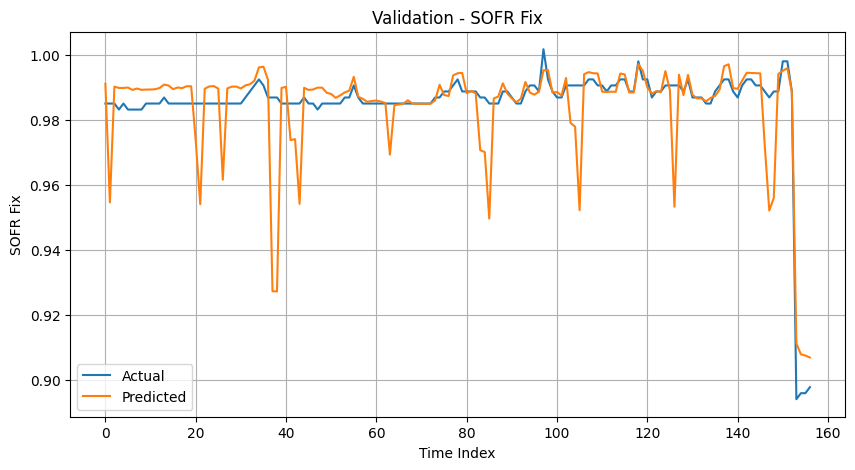

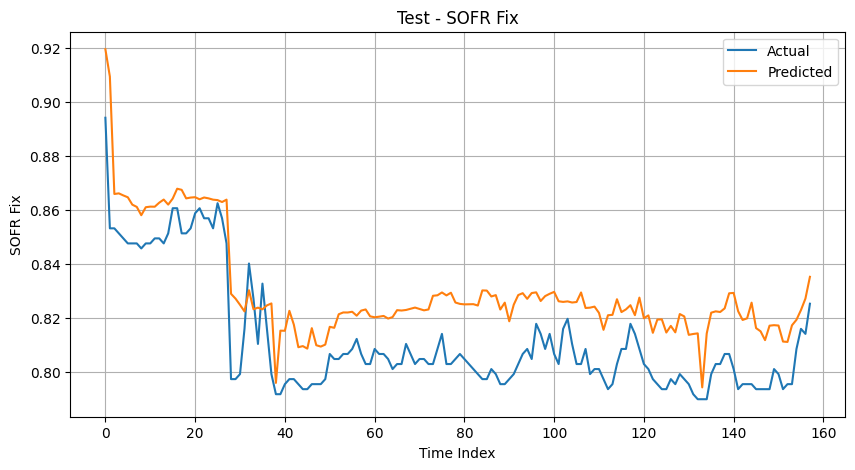

In [56]:
def plot_predictions(actual, predicted, title):
    plt.figure(figsize=(10, 5))
    plt.plot(actual.values, label="Actual")
    plt.plot(predicted, label="Predicted")
    plt.title(title)
    plt.xlabel("Time Index")
    plt.ylabel("SOFR Fix")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_predictions(y_val, y_val_pred, "Validation - SOFR Fix")
plot_predictions(y_test, y_test_pred, "Test - SOFR Fix")

In [57]:
feature_cols = df_train.columns.tolist()

# 🧠 Get the index of 'SOFR Fix'
sofr_fix_index = feature_cols.index('SOFR Fix')

# 🎯 Create dummy 2D array with only SOFR Fix values
# If you want just the last prediction:
last_scaled = np.array([[y_test_pred[-1]]])

# Trick: We need to inverse-transform the entire row, so we fake other values
# Let's create a dummy row with zeros
dummy_row = np.zeros((1, len(feature_cols)))
dummy_row[0, sofr_fix_index] = y_test_pred[-1]

# 🔁 Inverse-transform full row
full_inverse = m.inverse_transform(dummy_row)

# ✅ Extract descaled SOFR Fix
sofr_fix_descaled = full_inverse[0, sofr_fix_index]

# 🔍 Print it
print(f"🔢 Scaled SOFR Fix prediction: {y_test_pred[-1]:.4f}")
print(f"💰 Descaled SOFR Fix prediction: {sofr_fix_descaled:.4f}")

🔢 Scaled SOFR Fix prediction: 0.8352
💰 Descaled SOFR Fix prediction: 4.5035
